# Logistic Regression

## 1. Data Processing 

### Import Necessary Libraries

In [186]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split

### Importing Dataset

In [187]:
dataset = pd.read_csv('banknote_authentication.csv')

In [188]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [189]:
dataset.info

<bound method DataFrame.info of       variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]>

### Display the First Few Rows of the Dataset

In [190]:
dataset.head(5)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Getting Inputs and Outputs
Split the Dataset into Features (X) and Target (y)

In [191]:
X = dataset.iloc[:, :-1].values  # All features except the last column (class)
y = dataset.iloc[:, -1].values  # Target variable (class)

In [192]:
X

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [193]:
y

array([0, 0, 0, ..., 1, 1, 1])

### Creating Training Set and Test Set
Split the Dataset into Training and Test Sets

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [195]:
X_train

array([[-1.2943  ,  2.6735  , -0.84085 , -2.0323  ],
       [-0.40857 ,  3.0977  , -2.9607  , -2.6892  ],
       [-1.5228  , -6.4789  ,  5.7568  ,  0.87325 ],
       ...,
       [ 0.6005  ,  0.99945 , -2.2126  ,  0.097399],
       [ 2.0165  , -0.25246 ,  5.1707  ,  1.0763  ],
       [-2.0759  , 10.8223  ,  2.6439  , -4.837   ]])

In [196]:
X_test

array([[ -1.7713  , -10.7665  ,  10.2184  ,  -1.0043  ],
       [  5.1321  ,  -0.031048,   0.32616 ,   1.1151  ],
       [ -2.0149  ,   3.6874  ,  -1.9385  ,  -3.8918  ],
       ...,
       [ -2.1652  ,   3.0211  ,  -2.4132  ,  -2.4241  ],
       [  0.48797 ,   3.5674  ,  -4.3882  ,  -3.8116  ],
       [ -4.3667  ,   6.0692  ,   0.57208 ,  -5.4668  ]])

In [197]:
y_train

array([1, 1, 1, ..., 1, 0, 0])

In [198]:
y_test

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1])

### Feature Scaling (Important for Logistic Regression)

In [199]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [200]:
X_train

array([[-0.60234962,  0.13706318, -0.52441296, -0.41116219],
       [-0.291035  ,  0.21026408, -1.02368742, -0.72585061],
       [-0.68266235, -1.4422953 ,  1.02948859,  0.98074362],
       ...,
       [ 0.06363093, -0.15181461, -0.8474923 ,  0.60907164],
       [ 0.5613238 , -0.36784698,  0.89144827,  1.07801487],
       [-0.87706484,  1.54323822,  0.29632752, -1.75475574]])

## 2. Building and Training the Model
#### (Using Scikit-learn)

### Import Necessary Libraries

In [201]:
from sklearn.linear_model import LogisticRegression

### Building the Model

In [202]:
model = LogisticRegression(random_state=0)

### Training the Model

In [203]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Inference: Making Predictions on the Test Set

In [204]:
y_pred = model.predict(scaler.transform(X_test))

In [205]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1])

### Making Prediction of a Single Data Point

1. Variance of the banknote image = 0.5
2. Skewness of the banknote image = 0.0
3. Kurtosis of the banknote image = -2.0
4. Entropy of the banknote image = -1.0

In [206]:
model.predict(scaler.transform([[0.5, 0.0, -2.0, -1.0]]))

array([1])

In [207]:
# Input the banknote features
variance_input = 0.5
skewness_input = 0.0
kurtosis_input = -2.0
entropy_input = -1.0

# Create an array with the input values
banknote_features = [[variance_input, skewness_input, kurtosis_input, entropy_input]]

# Predict using the model and scale the input
prediction = model.predict(scaler.transform(banknote_features))

# Output the prediction
print(f"Prediction for the banknote features: {prediction[0]}")

# Interpretation
if prediction[0] == 0:
    print("The banknote is predicted to be Forged.")
else:
    print("The banknote is predicted to be Authentic.")

Prediction for the banknote features: 1
The banknote is predicted to be Authentic.


## 3. Evaluating the Model

### Import Necessary Libraries

In [208]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

### Confusion Matrix

In [209]:
confusion_matrix(y_test, y_pred)

array([[154,   3],
       [  0, 118]])

In [210]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Confusion Matrix:
[[154   3]
 [  0 118]]


### Accuracy

In [211]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:}")

Accuracy: 0.9890909090909091


In [212]:
(154+118)/(154+3+0+118)

0.9890909090909091

## 4. Visualization

### Import Necessary Libraries

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns

### Setting Up the Plot

### Visualizing the Confusion Matrix

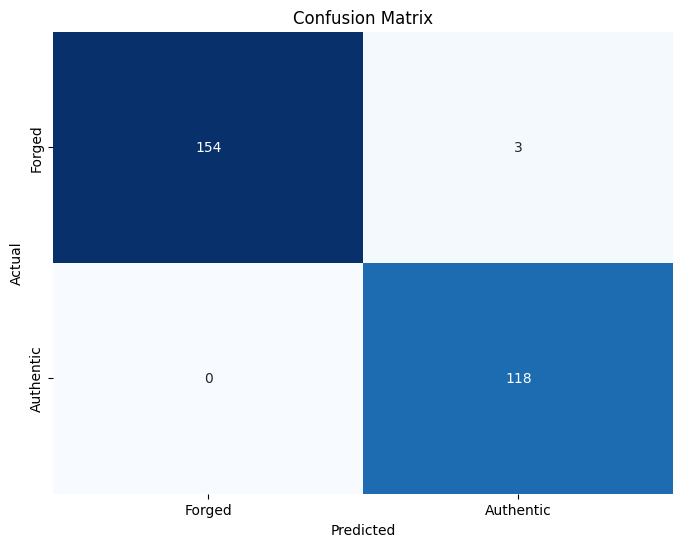

In [214]:
#size of the figure
plt.figure(figsize=(8, 6)) 

#Visualizing the Confusion Matrix with a Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Forged', 'Authentic'], yticklabels=['Forged', 'Authentic']) 

# Labeling the Plot
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

- sns.heatmap(): This function creates a heatmap from the confusion matrix cm.
- annot=True: This parameter displays the numerical values inside the heatmap squares.
- fmt='d': This format specifies that the annotation should be displayed as integers.
- cmap='Blues': This sets the color palette to shades of blue.
- cbar=False: This hides the color bar that typically shows the scale of values.
- xticklabels and yticklabels: These labels define what each axis represents. Here, "Forged" and "Authentic" refer to the classification of banknotes.

## 5. Interpretation

In [215]:
# Get coefficients for the features
coefficients = model.coef_[0]  # Only the first row, as it's binary classification

# Define feature names manually if X_train was a NumPy array
features = ['variance', 'skewness', 'kurtosis', 'entropy']

# Create a DataFrame to display feature importance
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
print("Feature importance:\n", coef_df)


Feature importance:
     Feature  Coefficient
0  variance    -4.690853
1  skewness    -4.759805
2  kurtosis    -4.309521
3   entropy     0.139582


### Interpretation of Results

In [216]:
print("\nModel Interpretation:")
print("The logistic regression model has an accuracy of {:.2f}% on the test set.".format(accuracy * 100))
print("The confusion matrix indicates how many of the actual classes were correctly classified.")
print("Each coefficient represents the change in the log odds of the target variable for a one-unit change in the predictor variable.")
print("A positive coefficient indicates that as the predictor increases, the likelihood of the target class being 1 (e.g., Authentic) increases.")
print("Conversely, a negative coefficient indicates that as the predictor increases, the likelihood of the target class being 0 (e.g., Forged) increases.")


Model Interpretation:
The logistic regression model has an accuracy of 98.91% on the test set.
The confusion matrix indicates how many of the actual classes were correctly classified.
Each coefficient represents the change in the log odds of the target variable for a one-unit change in the predictor variable.
A positive coefficient indicates that as the predictor increases, the likelihood of the target class being 1 (e.g., Authentic) increases.
Conversely, a negative coefficient indicates that as the predictor increases, the likelihood of the target class being 0 (e.g., Forged) increases.
